<a href="https://colab.research.google.com/github/kacperkurowski/CE888/blob/master/Assignment%201/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

In [0]:
import os
import seaborn as sns

##1.Loading Data

In [0]:
os.environ['KAGGLE_USERNAME'] = "kacperkurowski" # username from the json file

os.environ['KAGGLE_KEY'] = "7c927dd985620db03df77b3804e71a95" # key from the json file

!kaggle competitions download -c microsoft-malware-prediction # api copied from kaggle

 99% 761M/768M [00:19<00:00, 30.4MB/s]
100% 768M/768M [00:19<00:00, 41.9MB/s]
 92% 123M/134M [00:00<00:00, 102MB/s]  
100% 134M/134M [00:01<00:00, 126MB/s]
 98% 657M/672M [00:06<00:00, 85.8MB/s]
100% 672M/672M [00:06<00:00, 103MB/s] 


##1.Renaming Files as data downloaded causes overwrite due to same file names

In [0]:
!rename 's/test.csv.zip/test1.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/train1.csv.zip/' train.csv.zip
!ls

test.csv.zip not renamed: test1.csv.zip already exists
train.csv.zip not renamed: train1.csv.zip already exists
sample_submission.csv.zip  test2.csv.zip  train1.csv.zip  train.csv.zip
test1.csv.zip		   test.csv.zip   train2.csv.zip


##1.Removing Files that are not used

In [0]:
!rm sample_submission.csv.zip
!rm -r sample_data
!ls

rm: cannot remove 'sample_data': No such file or directory
test1.csv.zip  test.csv.zip    train2.csv.zip
test2.csv.zip  train1.csv.zip  train.csv.zip


##2.Loading Data

In [0]:
!kaggle competitions download -c santander-customer-transaction-prediction # api copied from kaggle

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
  0% 0.00/462k [00:00<?, ?B/s]
100% 462k/462k [00:00<00:00, 68.3MB/s]


##2.Renaming Files as data downloaded causes overwrite due to same file names

In [0]:
!rename 's/test.csv.zip/test2.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/train2.csv.zip/' train.csv.zip
!ls

test.csv.zip not renamed: test2.csv.zip already exists
train.csv.zip not renamed: train2.csv.zip already exists
sample_submission.csv.zip  test2.csv.zip  train1.csv.zip  train.csv.zip
test1.csv.zip		   test.csv.zip   train2.csv.zip


##2.Removing Files that are not used

In [0]:
!rm sample_submission.csv.zip
!ls

test1.csv.zip  test.csv.zip    train2.csv.zip
test2.csv.zip  train1.csv.zip  train.csv.zip


##Loading the files

In [0]:
import pandas as pd

df_test1 = pd.read_csv("test1.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_test1)

df_test2 = pd.read_csv("test2.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_test2)

df_train1 = pd.read_csv("train1.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_train1)

df_train2 = pd.read_csv("train2.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_train2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                        MachineIdentifier  ... Wdft_RegionIdentifier
0        0000010489e3af074adeac69c53e555e  ...                   7.0
1        00000176ac758d54827acd545b6315a5  ...                  12.0
2        0000019dcefc128c2d4387c1273dae1d  ...                  11.0
3        0000055553dc51b1295785415f1a224d  ...                  10.0
4        00000574cefffeca83ec8adf9285b2bf  ...                   3.0
...                                   ...  ...                   ...
7853248  fffff8c0e065c468a2373f7afd5e7674  ...                  10.0
7853249  fffff90b27a1248b6fffc7a535bd736c  ...                  11.0
7853250  fffffa6a956c17ddbabca53d4ab708ae  ...                   7.0
7853251  fffffad7b6c8196ec5cae634406c0d4f  ...                  11.0
7853252  fffffbd305a90eb0f93ee4f30a39c736  ...                  10.0

[7853253 rows x 82 columns]
            ID_code    var_0    var_1  ...  var_197  var_198  var_199
0            test_0  11.0656   7.7798  ...  10.7200  15.4722  -8.7197
1  

##Plotting Histogram of Microsoft-Malware-Prediction Train Data

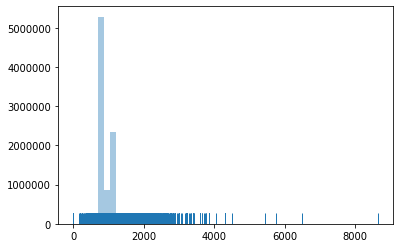

In [0]:
y_df = df_train1["Census_InternalPrimaryDisplayResolutionVertical"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Microsoft-Malware-Prediction Test Data

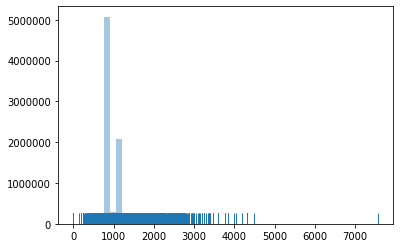

In [0]:
y_df = df_test1["Census_InternalPrimaryDisplayResolutionVertical"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Santander-Customer-Transaction-Prediction Train Data

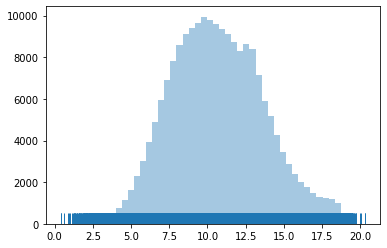

In [0]:
y_df = df_train2["var_0"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Santander-Customer-Transaction-Prediction Test Data

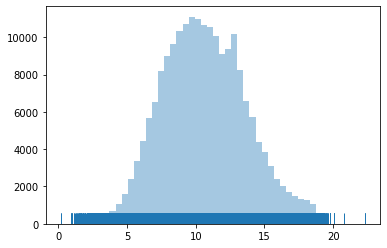

In [0]:
y_df = df_test2["var_0"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Adding Test Columns for testing Covariate Shift

In [0]:
df_train1['is_test'] = 0
df_test1['is_test'] = 1
print(df_train1.head())
print(df_test1.head())


                  MachineIdentifier   ProductName  ... HasDetections is_test
0  0000028988387b115f69f31a3bf04f09  win8defender  ...             0       0
1  000007535c3f730efa9ea0b7ef1bd645  win8defender  ...             0       0
2  000007905a28d863f6d0d597892cd692  win8defender  ...             0       0
3  00000b11598a75ea8ba1beea8459149f  win8defender  ...             1       0
4  000014a5f00daa18e76b81417eeb99fc  win8defender  ...             1       0

[5 rows x 84 columns]
                  MachineIdentifier  ... is_test
0  0000010489e3af074adeac69c53e555e  ...       1
1  00000176ac758d54827acd545b6315a5  ...       1
2  0000019dcefc128c2d4387c1273dae1d  ...       1
3  0000055553dc51b1295785415f1a224d  ...       1
4  00000574cefffeca83ec8adf9285b2bf  ...       1

[5 rows x 83 columns]


In [0]:
df_train2.drop(columns=['ID_code', 'target'], inplace=True)
df_test2.drop(columns=['ID_code'], inplace=True)
df_train2['is_test'] = 0
df_test2['is_test'] = 1
print(df_train2.head())
print(df_test2.head())

     var_0   var_1    var_2   var_3  ...  var_197  var_198  var_199  is_test
0   8.9255 -6.7863  11.9081  5.0930  ...   8.5635  12.7803  -1.0914        0
1  11.5006 -4.1473  13.8588  5.3890  ...   8.7889  18.3560   1.9518        0
2   8.6093 -2.7457  12.0805  7.8928  ...   8.2675  14.7222   0.3965        0
3  11.0604 -2.1518   8.9522  7.1957  ...  10.2922  17.9697  -8.9996        0
4   9.8369 -1.4834  12.8746  6.6375  ...   9.5031  17.9974  -8.8104        0

[5 rows x 201 columns]
     var_0    var_1    var_2   var_3  ...  var_197  var_198  var_199  is_test
0  11.0656   7.7798  12.9536  9.4292  ...  10.7200  15.4722  -8.7197        1
1   8.5304   1.2543  11.3047  5.1858  ...   9.8714  19.1293 -20.9760        1
2   5.4827 -10.3581  10.1407  7.0479  ...   7.0618  19.8956 -23.1794        1
3   8.5374  -1.3222  12.0220  6.5749  ...   9.2295  13.0168  -4.2108        1
4  11.7058  -0.1327  14.1295  7.7506  ...   7.2882  13.9260  -9.1846        1

[5 rows x 201 columns]


##Randomising Test and Train Data Sets

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

df = pd.concat([df_train2, df_test2], axis = 0)
X = df.drop(columns=['is_test'])
y = df['is_test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train2 shape:', X_train.shape, 'test2 shape:', X_test.shape)



##Let's use simple Random Forest as Classifier
#rfc = RandomForestClassifier()
#rfc.fit(X_train, y_train)
#y_test_score = rfc.predict_proba(X_test)



#import scikitplot as skplt
#import matplotlib.pyplot as plt

#skplt.metrics.plot_roc_curve(y_test, y_test_score)
#plt.show()


##AUC score is about 0.5
#print('AUC score: ', round(roc_auc_score(y_true=y_test, y_score=y_test_score[:,1]), 4))

train2 shape: (280000, 200) test2 shape: (120000, 200)


In [0]:
pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


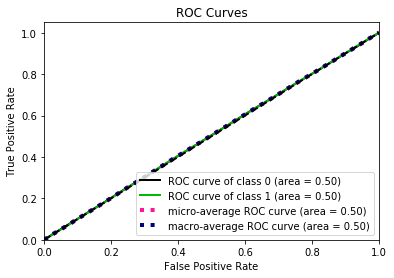

AUC score:  0.5027


In [0]:
##Let's use simple Random Forest as Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_score = rfc.predict_proba(X_test)

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, y_test_score)
plt.show()


##AUC score is about 0.5
print('AUC score: ', round(roc_auc_score(y_true=y_test, y_score=y_test_score[:,1]), 4))